In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.random.set_seed(42)

# 0. Загрузка и визуализация данных

In [2]:
df_train = pd.read_csv('../content/fashion-mnist/fashion-mnist_train.csv.zip')
df_test = pd.read_csv('../content/fashion-mnist/fashion-mnist_test.csv.zip')

df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [3]:
y_train_labels = df_train['label']
y_test_labels = df_test['label']

X_train = df_train.drop(columns='label')
X_test = df_test.drop(columns='label')

X_train, y_train_labels

(       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       5       0   
 3           0       0       0       1       2       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 59995       0       0       0       0       0       0       0       0       0   
 59996       0       0       0       0       0       0       0       0       0   
 59997       0       0       0       0       0       0       0       0       0   
 59998       0       0       0       0       0       0       0       0       0   
 59999       0       0       0       0       0       0       0       0       0   
 
        pixel1

Label is 7


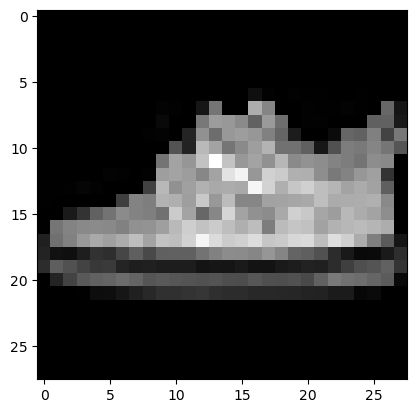

In [4]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(np.array(X_train.iloc[ind]).reshape(28, 28), cmap='gray')
print(f'Label is {y_train_labels[ind]}')

# 1. Предобработка данных

## 1.1 Нормировка признаков

In [5]:
X_train /= 255.0
X_test /= 255.0

X_train.min(axis=1).min(), X_train.max(axis=1).max()

(0.0, 1.0)

In [6]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## 1.2 Обработка целевого признака

In [7]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

# 2. Исследование простых нейросетей нейросети

## 2.1 В зависимости от числа нейронов слоя

In [8]:
num_epochs = 5
batch_size = 256

In [9]:
stata_1 = pd.DataFrame(columns=['Число нейронов слоя', 'accuracy_train', 'accuracy_test'])
stata_1

,Число нейронов слоя,accuracy_train,accuracy_test


In [10]:
from keras.layers import Dense
from keras.models import Sequential

for nn in [8, 16, 32, 64, 128, 256, 512]:
    tf.random.set_seed(42)
    model = Sequential()
    # входной слой за слой не считаем, только скрытый(-ые) и выходной
    model.add(Dense(nn, input_shape=(28 * 28,), activation='relu'))
    model.add(Dense(10, activation='sigmoid'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )
    print(100 * '*')
    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=batch_size, verbose=0)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

    stata_1 = stata_1.append(
        {
            'Число нейронов слоя': nn,
            'accuracy_train': train_metric,
            'accuracy_test': test_metric
            },
            ignore_index=True
        )

2023-11-27 21:37:52.919698: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
235/235 [==============================] - 4s 8ms/step - loss: 1.5040 - accuracy: 0.4688 - val_loss: 1.1064 - val_accuracy: 0.6580
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.8003 - accuracy: 0.7427 - val_loss: 0.6483 - val_accuracy: 0.7785
Epoch 3/5
235/235 [==============================] - 2s 8ms/step - loss: 0.6009 - accuracy: 0.7886 - val_loss: 0.5774 - val_accuracy: 0.7919
Epoch 4/5
235/235 [==============================] - 2s 6ms/step - loss: 0.5481 - accuracy: 0.8071 - val_loss: 0.5401 - val_accuracy: 0.8062
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.5122 - accuracy: 0.8204 - val_loss: 0.5012 - val_accuracy: 0.8263
****************************************************************************************************
Epoch 1/5
235/235 [==============================] - 2s 9ms/step - loss: 1.0467 - accuracy: 0.6436 - val_loss: 0.6376 - val_accuracy: 0.7865
Epoch 2/5
235/235 [==============================] - 

In [11]:
stata_1

,Число нейронов слоя,accuracy_train,accuracy_test
0,8.0,0.828217,0.8263
1,16.0,0.850950,0.8489
2,32.0,0.869100,0.8654
3,64.0,0.877250,0.8702
4,128.0,0.887217,0.8809
5,256.0,0.891767,0.8811
6,512.0,0.895133,0.8837


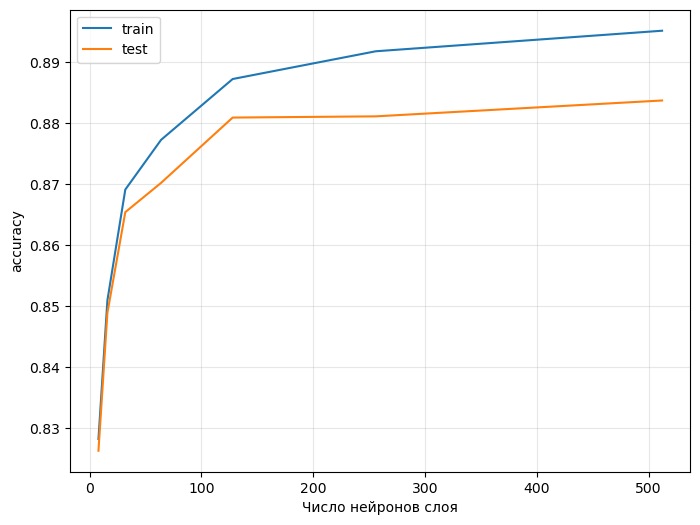

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(stata_1['Число нейронов слоя'], stata_1['accuracy_train'], label='train')
plt.plot(stata_1['Число нейронов слоя'], stata_1['accuracy_test'], label='test')
plt.xlabel('Число нейронов слоя')
plt.ylabel('accuracy')
plt.grid(alpha=.3)
plt.legend(loc='best');

**Выводы по п. 2.1:**



## 2.2 В зависимости от количества слоев (при близких размерах сети)

In [28]:
stata_2 = pd.DataFrame(columns=['Количество слоев', 'accuracy_train', 'accuracy_test'])
stata_2

,Количество слоев,accuracy_train,accuracy_test


In [14]:
model_2 = Sequential()
model_2.add(Dense(128, input_shape=(28 * 28,), activation='relu'))
model_2.add(Dense(10, activation='sigmoid'))
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770


Non-trainable params: 0
_________________________________________________________________


In [15]:
model_3 = Sequential()
model_3.add(Dense(115, input_shape=(28 * 28,), activation='relu'))
model_3.add(Dense(90, activation='relu'))
model_3.add(Dense(10, activation='sigmoid'))
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 115)               90275     
                                                                 
 dense_17 (Dense)            (None, 90)                10440     
                                                                 
 dense_18 (Dense)            (None, 10)                910       
                                                                 
Total params: 101,625
Trainable params: 101,625
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_5 = Sequential()
model_5.add(Dense(103, input_shape=(28 * 28,), activation='relu'))
model_5.add(Dense(94, activation='relu'))
model_5.add(Dense(75, activation='relu'))
model_5.add(Dense(46, activation='relu'))
model_5.add(Dense(10, activation='sigmoid'))
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 103)               80855     
                                                                 
 dense_20 (Dense)            (None, 94)                9776      
                                                                 
 dense_21 (Dense)            (None, 75)                7125      
                                                                 
 dense_22 (Dense)            (None, 46)                3496      
                                                                 
 dense_23 (Dense)            (None, 10)                470       
                                                                 
Total params: 101,722
Trainable params: 101,722
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_10 = Sequential()
model_10.add(Dense(92, input_shape=(28 * 28,), activation='relu'))
model_10.add(Dense(88, activation='relu'))
model_10.add(Dense(76, activation='relu'))
model_10.add(Dense(67, activation='relu'))
model_10.add(Dense(56, activation='relu'))
model_10.add(Dense(44, activation='relu'))
model_10.add(Dense(32, activation='relu'))
model_10.add(Dense(29, activation='relu'))
model_10.add(Dense(12, activation='relu'))
model_10.add(Dense(10, activation='sigmoid'))
model_10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 92)                72220     
                                                                 
 dense_25 (Dense)            (None, 88)                8184      
                                                                 
 dense_26 (Dense)            (None, 76)                6764      
                                                                 
 dense_27 (Dense)            (None, 67)                5159      
                                                                 
 dense_28 (Dense)            (None, 56)                3808      
                                                                 
 dense_29 (Dense)            (None, 44)                2508      
                                                                 
 dense_30 (Dense)            (None, 32)              

In [27]:
models = [model_2, model_3, model_5, model_10]

In [29]:
for model in models:
    model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )
    print(100 * '*')
    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=batch_size, verbose=0)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

    stata_2 = stata_2.append(
        {
            'Количество слоев': len(model.get_config()['layers'])-1,
            'accuracy_train': train_metric,
            'accuracy_test': test_metric
        },
        ignore_index=True
        )

Epoch 1/5
235/235 [==============================] - 3s 8ms/step - loss: 0.3142 - accuracy: 0.8888 - val_loss: 0.3345 - val_accuracy: 0.8827
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.3120 - accuracy: 0.8895 - val_loss: 0.3339 - val_accuracy: 0.8820
Epoch 3/5
235/235 [==============================] - 1s 6ms/step - loss: 0.3112 - accuracy: 0.8900 - val_loss: 0.3331 - val_accuracy: 0.8816
Epoch 4/5
235/235 [==============================] - 1s 6ms/step - loss: 0.3105 - accuracy: 0.8902 - val_loss: 0.3327 - val_accuracy: 0.8822
Epoch 5/5
235/235 [==============================] - 1s 6ms/step - loss: 0.3100 - accuracy: 0.8906 - val_loss: 0.3323 - val_accuracy: 0.8816
****************************************************************************************************
Epoch 1/5
235/235 [==============================] - 3s 8ms/step - loss: 0.2960 - accuracy: 0.8928 - val_loss: 0.3229 - val_accuracy: 0.8863
Epoch 2/5
235/235 [==============================] - 

In [30]:
stata_2

,Количество слоев,accuracy_train,accuracy_test
0,2.0,0.890800,0.8816
1,3.0,0.895967,0.8871
2,5.0,0.897783,0.8836
3,10.0,0.894367,0.8823


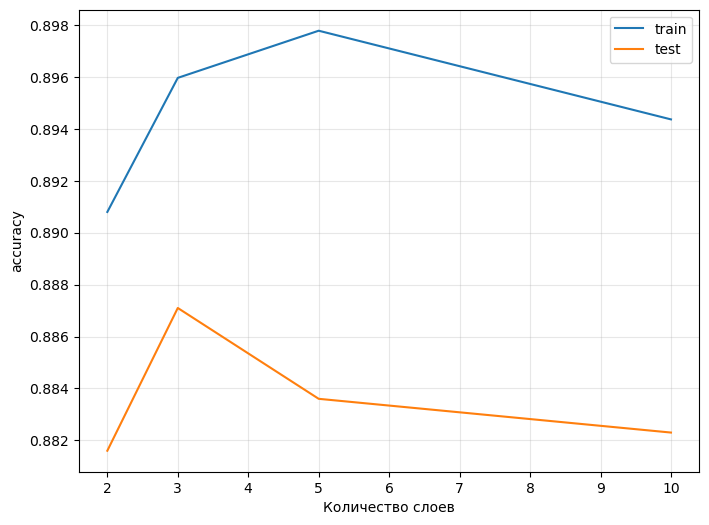

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(stata_2['Количество слоев'], stata_2['accuracy_train'], label='train')
plt.plot(stata_2['Количество слоев'], stata_2['accuracy_test'], label='test')
plt.xlabel('Количество слоев')
plt.ylabel('accuracy')
plt.grid(alpha=.3)
plt.legend(loc='best');

**Выводы по п. 2.2:**



# 3. Исследование работы разных оптимизаторов (`SGD`, `Adam`, `RMSProp`)

In [33]:
config_5 = model_5.get_config()

In [79]:
stata_3 = pd.DataFrame(columns=['Оптимизатор', 'accuracy_train', 'accuracy_test'])
stata_3

,Оптимизатор,accuracy_train,accuracy_test


In [80]:
from keras import optimizers

for opt in [optimizers.gradient_descent_v2.SGD(),
            optimizers.adam_v2.Adam(),
            optimizers.rmsprop_v2.RMSprop()
            ]:
        # инициализируем последовательную модель параметрами от model_5
        model = Sequential()
        model = model.from_config(config_5)
        
        model.compile(
                optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'],
                )
        

        model.fit(X_train, y_train,
                  epochs=num_epochs,
                  batch_size=batch_size,
                  validation_data=(X_test, y_test),
                  verbose=1)
        print(100 * '*')
        
        train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=batch_size, verbose=0)
        test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

        stata_3 = stata_3.append(
                {
                        'Оптимизатор': model.optimizer.get_config()['name'],
                        'accuracy_train': train_metric,
                        'accuracy_test': test_metric
                        },
                        ignore_index=True
                        )

        

Epoch 1/5
235/235 [==============================] - 3s 11ms/step - loss: 1.7286 - accuracy: 0.4190 - val_loss: 1.1056 - val_accuracy: 0.6639
Epoch 2/5
235/235 [==============================] - 2s 8ms/step - loss: 0.8767 - accuracy: 0.7092 - val_loss: 0.7807 - val_accuracy: 0.7249
Epoch 3/5
235/235 [==============================] - 2s 9ms/step - loss: 0.7010 - accuracy: 0.7515 - val_loss: 0.6609 - val_accuracy: 0.7553
Epoch 4/5
235/235 [==============================] - 2s 8ms/step - loss: 0.6324 - accuracy: 0.7720 - val_loss: 0.6525 - val_accuracy: 0.7653
Epoch 5/5
235/235 [==============================] - 2s 8ms/step - loss: 0.5899 - accuracy: 0.7888 - val_loss: 0.5950 - val_accuracy: 0.7942
****************************************************************************************************
Epoch 1/5
235/235 [==============================] - 3s 11ms/step - loss: 0.6361 - accuracy: 0.7757 - val_loss: 0.4711 - val_accuracy: 0.8381
Epoch 2/5
235/235 [==============================] 

In [81]:
stata_3

,Оптимизатор,accuracy_train,accuracy_test
0,SGD,0.795150,0.7942
1,Adam,0.886333,0.8742
2,RMSprop,0.887850,0.8776


<Figure size 1800x1500 with 0 Axes>

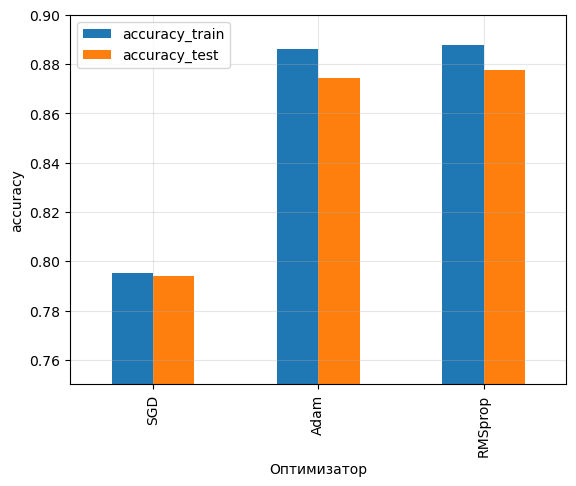

In [92]:
plt.figure(figsize=(12, 10), dpi=150)
stata_3.plot(x='Оптимизатор', kind='bar')
plt.xlabel('Оптимизатор')
plt.ylim([.75, .90])
plt.ylabel('accuracy')
plt.grid(alpha=.3)
plt.legend(loc='best');

**Выводы по п. 3:**

